In [165]:
import glob
import pandas as pd
import json
import requests

In [166]:
import pandas as pd

df1 = pd.read_excel("C:/Users/Rajasekar/Downloads/kolkata_cars (1).xlsx")
df2 = pd.read_excel("C:/Users/Rajasekar/Downloads/jaipur_cars (1).xlsx")
df3 = pd.read_excel("C:/Users/Rajasekar/Downloads/hyderabad_cars (1).xlsx")
df4 = pd.read_excel("C:/Users/Rajasekar/Downloads/delhi_cars (1).xlsx")
df5 = pd.read_excel("C:/Users/Rajasekar/Downloads/chennai_cars (1).xlsx")
df6 = pd.read_excel("C:/Users/Rajasekar/Downloads/bangalore_cars (2).xlsx")

df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [167]:
import ast  # Import the ast (Abstract Syntax Trees) module

# Convert string representations of dictionaries to actual dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now you can use the extraction code as before
df['fuel_type'] = df['new_car_detail'].apply(lambda x: x.get('ft', None))
df['body_type'] = df['new_car_detail'].apply(lambda x: x.get('bt', None))
df['kilometers'] = df['new_car_detail'].apply(lambda x: x.get('km', None))
df['transmission'] = df['new_car_detail'].apply(lambda x: x.get('transmission', None))
df['owner_number'] = df['new_car_detail'].apply(lambda x: x.get('ownerNo', None))
df['owner'] = df['new_car_detail'].apply(lambda x: x.get('owner', None))
df['oem'] = df['new_car_detail'].apply(lambda x: x.get('oem', None))
df['model'] = df['new_car_detail'].apply(lambda x: x.get('model', None))
df['model_year'] = df['new_car_detail'].apply(lambda x: x.get('modelYear', None))
df['central_variant_id'] = df['new_car_detail'].apply(lambda x: x.get('centralVariantId', None))
df['variant_name'] = df['new_car_detail'].apply(lambda x: x.get('variantName', None))
df['price'] = df['new_car_detail'].apply(lambda x: x.get('price', None))

In [168]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,owner,oem,model,model_year,central_variant_id,variant_name,price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh


In [169]:
import ast

# Convert string representations of dictionaries to actual dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract specific values from 'new_car_overview' with error handling
df['registration_year'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[0]['value'] if x and 'top' in x and len(x['top']) > 0 else None)
df['insurance_validity'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[1]['value'] if x and 'top' in x and len(x['top']) > 1 else None)
df['fuel_type_overview'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[2]['value'] if x and 'top' in x and len(x['top']) > 2 else None)
df['seats'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[3]['value'] if x and 'top' in x and len(x['top']) > 3 else None)
df['kms_driven'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[4]['value'] if x and 'top' in x and len(x['top']) > 4 else None)
df['rto'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[5]['value'] if x and 'top' in x and len(x['top']) > 5 else None)
df['ownership'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[6]['value'] if x and 'top' in x and len(x['top']) > 6 else None)
df['engine_displacement'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[7]['value'] if x and 'top' in x and len(x['top']) > 7 else None)
df['transmission_overview'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[8]['value'] if x and 'top' in x and len(x['top']) > 8 else None)
df['year_of_manufacture'] = df['new_car_overview'].apply(lambda x: x.get('top', [])[9]['value'] if x and 'top' in x and len(x['top']) > 9 else None)

# Display the resulting DataFrame
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,registration_year,insurance_validity,fuel_type_overview,seats,kms_driven,rto,ownership,engine_displacement,transmission_overview,year_of_manufacture
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,...,2014,Third Party insurance,Petrol,5 Seats,"70,000 Kms",WB02,Third Owner,2494 cc,Automatic,2014.0
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,...,Jul 2017,Comprehensive,Petrol,5 Seats,"23,981 Kms",WB24,First Owner,799 cc,Manual,2017.0
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,...,Nov 2021,Comprehensive,Petrol,5 Seats,"7,100 Kms",WB06,First Owner,999 cc,Automatic,2021.0
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,...,Feb 2012,Third Party,Petrol,5 Seats,"71,574 Kms",WB06,Second Owner,1197 cc,Manual,2011.0
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,...,2014,Third Party insurance,Diesel,5 Seats,"50,000 Kms",WB02,Second Owner,1968 cc,Automatic,2014.0


In [170]:
import ast

# Convert string representations of dictionaries to actual dictionaries
df['new_car_feature'] = df['new_car_feature'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract specific values from 'new_car_feature'
df['comfort_and_convenience'] = df['new_car_feature'].apply(lambda x: ', '.join(item['value'] for item in x.get('data', [])[0]['list']) if x and 'data' in x and len(x['data']) > 0 else None)
df['interior_features'] = df['new_car_feature'].apply(lambda x: ', '.join(item['value'] for item in x.get('data', [])[1]['list']) if x and 'data' in x and len(x['data']) > 1 else None)
df['exterior_features'] = df['new_car_feature'].apply(lambda x: ', '.join(item['value'] for item in x.get('data', [])[2]['list']) if x and 'data' in x and len(x['data']) > 2 else None)
df['safety_features'] = df['new_car_feature'].apply(lambda x: ', '.join(item['value'] for item in x.get('data', [])[3]['list']) if x and 'data' in x and len(x['data']) > 3 else None)
df['entertainment_features'] = df['new_car_feature'].apply(lambda x: ', '.join(item['value'] for item in x.get('data', [])[4]['list']) if x and 'data' in x and len(x['data']) > 4 else None)

# Display the resulting DataFrame
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,rto,ownership,engine_displacement,transmission_overview,year_of_manufacture,comfort_and_convenience,interior_features,exterior_features,safety_features,entertainment_features
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,...,WB02,Third Owner,2494 cc,Automatic,2014.0,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Brake Assist, Center...","Cd Player, Dvd Player, Radio, Speakers Front, ..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,...,WB24,First Owner,799 cc,Manual,2017.0,"Power Steering, Power Windows Front, Remote Tr...","Air Conditioner, Heater, Tachometer, Electroni...","Adjustable Head Lights, Manually Adjustable Ex...","Anti Lock Braking System, Centeral Locking, Ch...","Radio, Speakers Front, Usb Auxiliary Input, Bl..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,...,WB06,First Owner,999 cc,Automatic,2021.0,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Power Adjustable Exter...","Anti Lock Braking System, Centeral Locking, Po...","Radio, Speakers Front, Speakers Rear, Integrat..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,...,WB06,Second Owner,1197 cc,Manual,2011.0,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Fog Lights Rear, Power Adjustable Exterior Rea...","Centeral Locking, Power Door Locks, Child Safe...","Cd Player, Radio, Speakers Front, Speakers Rear"
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,...,WB02,Second Owner,1968 cc,Automatic,2014.0,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Brake Assist, Center...","Cd Player, Radio, Audio System Remote Control,..."


In [171]:
# Convert string representations of dictionaries to actual dictionaries
df['new_car_specs'] = df['new_car_specs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define a function to extract values
def extract_specifications(specs, key):
    if not specs or 'top' not in specs:
        return None
    
    for item in specs['top']:
        if item['key'] == key:
            return item['value']
    
    return None

# Extract specific values from 'new_car_specs'
df['mileage'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Mileage'))
df['engine'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Engine'))
df['max_power'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Max Power'))
df['torque'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Torque'))
df['wheel_size'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Wheel Size'))
df['seats'] = df['new_car_specs'].apply(lambda x: extract_specifications(x, 'Seats'))

# Display the resulting DataFrame
df.head()


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,comfort_and_convenience,interior_features,exterior_features,safety_features,entertainment_features,mileage,engine,max_power,torque,wheel_size
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,...,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Brake Assist, Center...","Cd Player, Dvd Player, Radio, Speakers Front, ...",19.16 kmpl,2494 CC,158.2bhp,213Nm,17
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,...,"Power Steering, Power Windows Front, Remote Tr...","Air Conditioner, Heater, Tachometer, Electroni...","Adjustable Head Lights, Manually Adjustable Ex...","Anti Lock Braking System, Centeral Locking, Ch...","Radio, Speakers Front, Usb Auxiliary Input, Bl...",22.7 kmpl,799 CC,53.64bhp,72Nm,None
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,...,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Power Adjustable Exter...","Anti Lock Braking System, Centeral Locking, Po...","Radio, Speakers Front, Speakers Rear, Integrat...",19.03 kmpl,999 CC,71.01bhp,96Nm,None
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,...,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Fog Lights Rear, Power Adjustable Exterior Rea...","Centeral Locking, Power Door Locks, Child Safe...","Cd Player, Radio, Speakers Front, Speakers Rear",17 kmpl,1197 CC,80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",14
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,...,"Power Steering, Power Windows Front, Power Win...","Air Conditioner, Heater, Adjustable Steering, ...","Adjustable Head Lights, Fog Lights Front, Fog ...","Anti Lock Braking System, Brake Assist, Center...","Cd Player, Radio, Audio System Remote Control,...",15.73 kmpl,1968 CC,174.33bhp,380Nm,16


In [172]:
# Convert string representations of dictionaries to actual dictionaries
df['new_car_specs'] = df['new_car_specs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract specific values from 'new_car_specs'
df['mileage'] = df['new_car_specs'].apply(lambda x: x['top'][0]['value'] if x and 'top' in x and len(x['top']) > 0 else None)
df['engine'] = df['new_car_specs'].apply(lambda x: x['top'][1]['value'] if x and 'top' in x and len(x['top']) > 1 else None)
df['max_power'] = df['new_car_specs'].apply(lambda x: x['top'][2]['value'] if x and 'top' in x and len(x['top']) > 2 else None)
df['torque'] = df['new_car_specs'].apply(lambda x: x['top'][3]['value'] if x and 'top' in x and len(x['top']) > 3 else None)
df['wheel_size'] = df['new_car_specs'].apply(lambda x: x['top'][4]['value'] if x and 'top' in x and len(x['top']) > 4 else None)
df['seats'] = df['new_car_specs'].apply(lambda x: x['top'][5]['value'] if x and 'top' in x and len(x['top']) > 5 else None)
df['Engine Type'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][1]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 1 else None)
df['No of Cylinder'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][5]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 5 else None)
df['Values per Cylinder'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][6]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 6 else None)
df['Value Configuration'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][7]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 7 else None)
df['Fuel Suppy System'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][8]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 8 else None)
df['Turbo Charger'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][10]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 10 else None)
df['Super Charger'] = df['new_car_specs'].apply(lambda x: x['data'][0]['list'][11]['value'] if x and 'data' in x and len(x['data']) > 0 and 'list' in x['data'][0] and len(x['data'][0]['list']) > 11 else None)
df['Length'] = df['new_car_specs'].apply(lambda x: x['data'][1]['list'][0]['value'] if x and 'data' in x and len(x['data']) > 1 and 'list' in x['data'][1] and len(x['data'][1]['list']) > 0 else None)
df['Width'] = df['new_car_specs'].apply(lambda x: x['data'][1]['list'][1]['value'] if x and 'data' in x and len(x['data']) > 1 and 'list' in x['data'][1] and len(x['data'][1]['list']) > 1 else None)
df['Height'] = df['new_car_specs'].apply(lambda x: x['data'][1]['list'][2]['value'] if x and 'data' in x and len(x['data']) > 1 and 'list' in x['data'][1] and len(x['data'][1]['list']) > 2 else None)
df['Wheel Base'] = df['new_car_specs'].apply(lambda x: x['data'][1]['list'][3]['value'] if x and 'data' in x and len(x['data']) > 1 and 'list' in x['data'][1] and len(x['data'][1]['list']) > 3 else None)
df['Kerb Weight'] = df['new_car_specs'].apply(lambda x: x['data'][1]['list'][4]['value'] if x and 'data' in x and len(x['data']) > 1 and 'list' in x['data'][1] and len(x['data'][1]['list']) > 4 else None)
df['Gear Box'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][0]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 0 else None)
df['Seating Capacity'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][1]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 1 else None)
df['Turning Radius'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][3]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 3 else None)
df['Front Brake Type'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][4]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 4 else None)
df['Rear Brake Type'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][5]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 5 else None)
df['Acceleration'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][6]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 6 else None)
df['Tyre Type'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][7]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 7 else None)
df['Alloy Wheel Size'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][8]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 8 else None)
df['No Door Numbers'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][9]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 9 else None)
df['Cargo Volumn'] = df['new_car_specs'].apply(lambda x: x['data'][2]['list'][10]['value'] if x and 'data' in x and len(x['data']) > 2 and 'list' in x['data'][2] and len(x['data'][2]['list']) > 10 else None)

# Display the resulting DataFrame
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,Gear Box,Seating Capacity,Turning Radius,Front Brake Type,Rear Brake Type,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,...,6 Speed,FWD,Power,5.5 metres,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4,None
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,...,5-Speed,2WD,Power,4.7m,Disc,Drum,5,222,None,None
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,...,5 Speed,5,Disc,Drum,"Tubeless, Radial",5,405,None,None,None
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,...,5 Speed,FWD,Power,5.20 m,Disc,Drum,12.96 Sec,"Tubeless,Radial",14,5
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,...,7-Speed S-Tronic,AWD,Power,5.9 metres,Ventilated Disc,Drum,212 Kmph,8.2 Seconds,"Tubeless,Radial",16


In [173]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_drop = ['Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Acceleration', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers', 'Cargo Volumn']
df = df.drop(columns=columns_to_drop)

In [174]:
df.tail()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Seating Capacity
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"1,56,039",Manual,2,...,CRDi,No,None,4705mm,1840mm,1850mm,2750mm,1540mm,5 Speed,4WD
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"56,000",Manual,2,...,MPFI,9:01,No,4490mm,1735mm,1570mm,2500mm,1500mm,5 Speed,5
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"42,000",Manual,2,...,PGM - Fi,No,None,3610mm,1680mm,1500mm,2345mm,1480mm,5 Speed,FWD
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Hatchback,"93,003",Manual,1,...,CRDI,No,None,3985mm,1734mm,1505mm,2570mm,1505mm,6 Speed,FWD
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"36,000",Automatic,2,...,MPFI,No,None,3765mm,1660mm,1520mm,2425mm,1479mm,4 Speed,FWD


In [175]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.rename(columns={'Seating Capacity': 'Drive Type'}, inplace=True)

In [176]:
df.tail()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,transmission,owner_number,...,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"1,56,039",Manual,2,...,CRDi,No,None,4705mm,1840mm,1850mm,2750mm,1540mm,5 Speed,4WD
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"56,000",Manual,2,...,MPFI,9:01,No,4490mm,1735mm,1570mm,2500mm,1500mm,5 Speed,5
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"42,000",Manual,2,...,PGM - Fi,No,None,3610mm,1680mm,1500mm,2345mm,1480mm,5 Speed,FWD
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Hatchback,"93,003",Manual,1,...,CRDI,No,None,3985mm,1734mm,1505mm,2570mm,1505mm,6 Speed,FWD
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"36,000",Automatic,2,...,MPFI,No,None,3765mm,1660mm,1520mm,2425mm,1479mm,4 Speed,FWD


In [177]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_drop = ['new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links']
df = df.drop(columns=columns_to_drop)

In [178]:
df.tail()

,fuel_type,body_type,kilometers,transmission,owner_number,owner,oem,model,model_year,central_variant_id,...,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type
1476,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,2253,...,CRDi,No,None,4705mm,1840mm,1850mm,2750mm,1540mm,5 Speed,4WD
1477,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,4257,...,MPFI,9:01,No,4490mm,1735mm,1570mm,2500mm,1500mm,5 Speed,5
1478,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,1188,...,PGM - Fi,No,None,3610mm,1680mm,1500mm,2345mm,1480mm,5 Speed,FWD
1479,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,5695,...,CRDI,No,None,3985mm,1734mm,1505mm,2570mm,1505mm,6 Speed,FWD
1480,Petrol,Hatchback,"36,000",Automatic,2,2nd Owner,Hyundai,Hyundai Grand i10,2017,1523,...,MPFI,No,None,3765mm,1660mm,1520mm,2425mm,1479mm,4 Speed,FWD


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1480
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fuel_type                8369 non-null   object 
 1   body_type                8369 non-null   object 
 2   kilometers               8369 non-null   object 
 3   transmission             8369 non-null   object 
 4   owner_number             8369 non-null   int64  
 5   owner                    8369 non-null   object 
 6   oem                      8369 non-null   object 
 7   model                    8369 non-null   object 
 8   model_year               8369 non-null   int64  
 9   central_variant_id       8369 non-null   int64  
 10  variant_name             8369 non-null   object 
 11  price                    8369 non-null   object 
 12  registration_year        8369 non-null   object 
 13  insurance_validity       8369 non-null   object 
 14  fuel_type_overview       8369

In [180]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [181]:
missing_data(data= df)

,Total,Percent
Super Charger,6069,72.517625
seats,3243,38.750149
Turbo Charger,2452,29.298602
Fuel Suppy System,1451,17.337794
entertainment_features,1098,13.119847
year_of_manufacture,915,10.933206
Value Configuration,842,10.060939
Values per Cylinder,178,2.126897
wheel_size,120,1.433863
safety_features,105,1.254630


In [182]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_drop = ['Super Charger','seats','Turbo Charger']
df = df.drop(columns=columns_to_drop)

In [183]:
import pandas as pd

# Assuming 'df' is your DataFrame
unique_values_per_column = {column: df[column].unique() for column in df.columns}

# Print or use the unique values
for column, values in unique_values_per_column.items():
    print(f"Unique values in column '{column}':\n{values}")

Unique values in column 'fuel_type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
Unique values in column 'body_type':
['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' '' 'Convertibles' 'Minivans'
 'Pickup Trucks' 'Wagon' 'Hybrids']
Unique values in column 'kilometers':
['70,000' '23,981' '7,100' ... '37,950' '1,56,039' '93,003']
Unique values in column 'transmission':
['Automatic' 'Manual']
Unique values in column 'owner_number':
[3 1 2 4 0 5]
Unique values in column 'owner':
['3rd Owner' '1st Owner' '2nd Owner' '4th Owner' '0th Owner' '5th Owner']
Unique values in column 'oem':
['Toyota' 'Datsun' 'Renault' 'Hyundai' 'Audi' 'Maruti' 'Tata' 'Jeep'
 'Land Rover' 'Honda' 'Mercedes-Benz' 'Mahindra' 'Skoda' 'BMW' 'Fiat'
 'Ford' 'Hindustan Motors' 'Volvo' 'Chevrolet' 'Kia' 'MG' 'Volkswagen'
 'Porsche' 'Nissan' 'Jaguar' 'Mahindra Ssangyong' 'Mahindra Renault'
 'Mitsubishi' 'Isuzu' 'Citroen' 'Mini' 'Lexus' 'Opel']
Unique values in column 'model':
['Toyota Camry' 'Datsun RediGO' 'Renault Kiger' 'Hyundai

In [184]:
df.isnull().sum()

fuel_type                     0
body_type                     0
kilometers                    0
transmission                  0
owner_number                  0
owner                         0
oem                           0
model                         0
model_year                    0
central_variant_id            0
variant_name                  0
price                         0
registration_year             0
insurance_validity            0
fuel_type_overview            0
kms_driven                    0
rto                           0
ownership                     1
engine_displacement          38
transmission_overview        54
year_of_manufacture         915
comfort_and_convenience      65
interior_features            73
exterior_features            85
safety_features             105
entertainment_features     1098
mileage                       0
engine                        1
max_power                     8
torque                       27
wheel_size                  120
Engine T

In [185]:
# Assuming 'df' is your DataFrame
shape = df.shape

# Print or display the shape
print(shape)

(8369, 43)


In [118]:
# Assuming 'df' is your DataFrame
columns_to_drop = ['comfort_and_convenience','interior_features','exterior_features','entertainment_features','safety_features']
df = df.drop(columns=columns_to_drop)

In [119]:
df = df.dropna()
df.isnull().sum()

fuel_type                0
body_type                0
kilometers               0
transmission             0
owner_number             0
owner                    0
oem                      0
model                    0
model_year               0
central_variant_id       0
variant_name             0
price                    0
registration_year        0
insurance_validity       0
fuel_type_overview       0
kms_driven               0
rto                      0
ownership                0
engine_displacement      0
transmission_overview    0
year_of_manufacture      0
mileage                  0
engine                   0
max_power                0
torque                   0
wheel_size               0
Engine Type              0
No of Cylinder           0
Values per Cylinder      0
Value Configuration      0
Fuel Suppy System        0
Length                   0
Width                    0
Height                   0
Wheel Base               0
Kerb Weight              0
Gear Box                 0
D

In [120]:
# Assuming 'df' is your DataFrame
shape = df.shape

# Print or display the shape
print(shape)

(6095, 38)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 1480
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fuel_type              6095 non-null   object 
 1   body_type              6095 non-null   object 
 2   kilometers             6095 non-null   object 
 3   transmission           6095 non-null   object 
 4   owner_number           6095 non-null   int64  
 5   owner                  6095 non-null   object 
 6   oem                    6095 non-null   object 
 7   model                  6095 non-null   object 
 8   model_year             6095 non-null   int64  
 9   central_variant_id     6095 non-null   int64  
 10  variant_name           6095 non-null   object 
 11  price                  6095 non-null   object 
 12  registration_year      6095 non-null   object 
 13  insurance_validity     6095 non-null   object 
 14  fuel_type_overview     6095 non-null   object 
 15  kms_drive

In [122]:
import pandas as pd

# Assuming 'df' is your DataFrame
unique_values_per_column = {column: df[column].unique() for column in df.columns}

# Print or use the unique values
for column, values in unique_values_per_column.items():
    print(f"Unique values in column '{column}':\n{values}")

Unique values in column 'fuel_type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
Unique values in column 'body_type':
['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' 'Convertibles' 'Minivans'
 'Pickup Trucks' 'Wagon' 'Hybrids']
Unique values in column 'kilometers':
['70,000' '23,981' '71,574' ... '37,950' '1,56,039' '93,003']
Unique values in column 'transmission':
['Automatic' 'Manual']
Unique values in column 'owner_number':
[3 1 2 4 5]
Unique values in column 'owner':
['3rd Owner' '1st Owner' '2nd Owner' '4th Owner' '5th Owner']
Unique values in column 'oem':
['Toyota' 'Datsun' 'Hyundai' 'Audi' 'Maruti' 'Renault' 'Jeep' 'Honda'
 'Mercedes-Benz' 'Tata' 'Skoda' 'BMW' 'Fiat' 'Ford' 'Mahindra'
 'Land Rover' 'Volvo' 'Kia' 'Chevrolet' 'Volkswagen' 'Porsche' 'Nissan'
 'Jaguar' 'Mahindra Ssangyong' 'Mahindra Renault' 'Isuzu' 'Lexus' 'Mini'
 'Mitsubishi']
Unique values in column 'model':
['Toyota Camry' 'Datsun RediGO' 'Hyundai i20' 'Audi Q3' 'Maruti Wagon R'
 'Hyundai Santro' 'Renault KWID' 'Maruti

In [186]:
#Analaysis

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


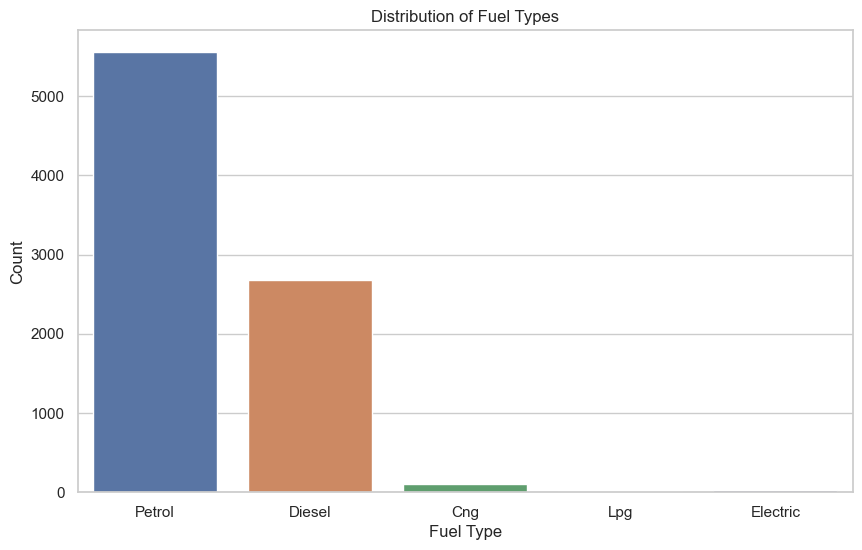

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Bar plot for fuel_type
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [188]:
import pandas as pd

# Assuming df is your DataFrame
df['price'] = df['price'].replace({'₹': '', 'Lakh': ''}, regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

   price
0   9.75
1   2.66
2   5.95
3   2.23
4  12.00


In [192]:
price_null_values = df['price'].isnull().sum()
print("Number of null values in 'price' column:", price_null_values)
df.dropna(subset=['price'], inplace=True)
price_null_values_after_drop = df['price'].isnull().sum()
print("Number of null values in 'price' column after dropping:", price_null_values_after_drop)

Number of null values in 'price' column: 130
Number of null values in 'price' column after dropping: 0


In [197]:
df['price'] = df['price'] * 100000

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


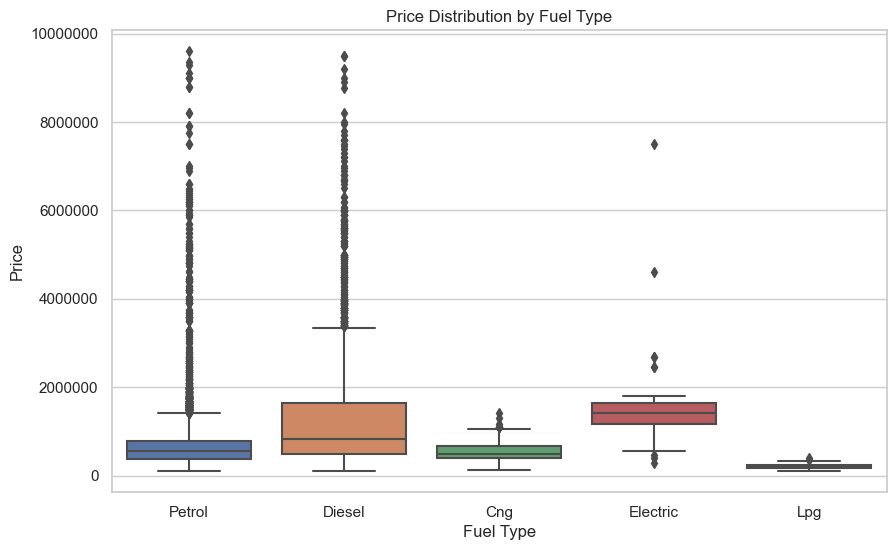

In [205]:
#convert price and Km into numerical
df['kms_driven'] = pd.to_numeric(df['kms_driven'].replace('[, Kms]', '', regex=True), errors='coerce')
#Box plot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


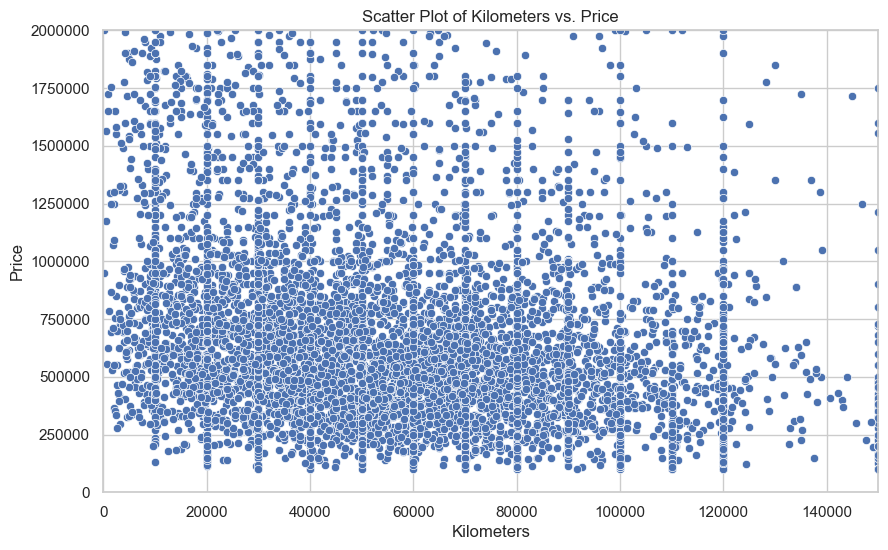

In [204]:
#Scatter plot for kilometers and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.title('Scatter Plot of Kilometers vs. Price')
plt.xlabel('Kilometers')
plt.ylabel('Price')
# Adjusting x and y-axis ranges
plt.xlim(0, 150000)  # Set the x-axis range according to your data
plt.ylim(0, 2000000)  # Set the y-axis range according to your data
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks in regular format
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


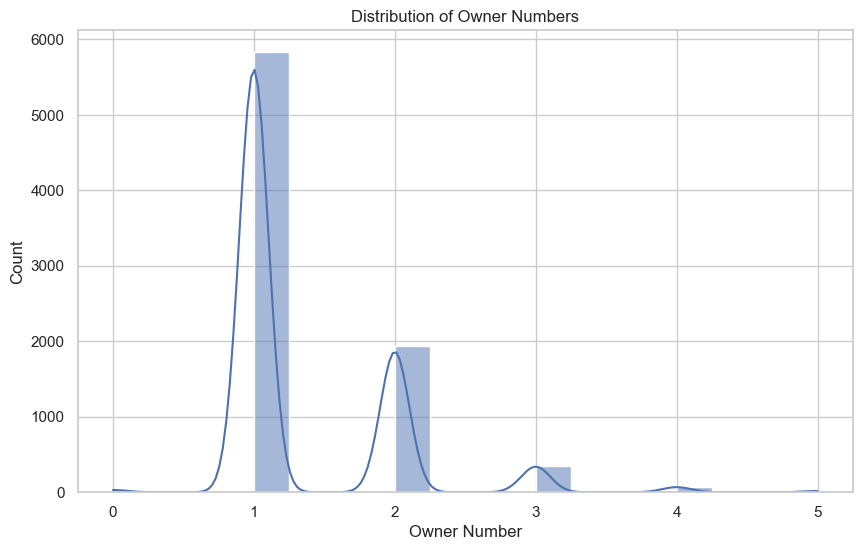

In [206]:
#Histogram for owner_number
plt.figure(figsize=(10, 6))
sns.histplot(df['owner_number'], bins=20, kde=True)
plt.title('Distribution of Owner Numbers')
plt.xlabel('Owner Number')
plt.ylabel('Count')
plt.show()

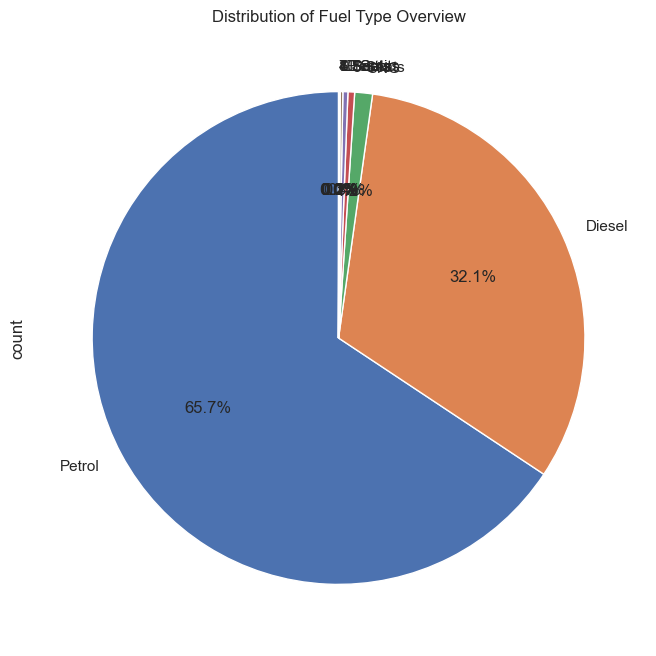

In [207]:
# Pie chart for fuel_type_overview
plt.figure(figsize=(8, 8))
df['fuel_type_overview'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Type Overview')
plt.show()

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_13400\4236670550.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission_Type', y='price', data=df, ci=None)
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype

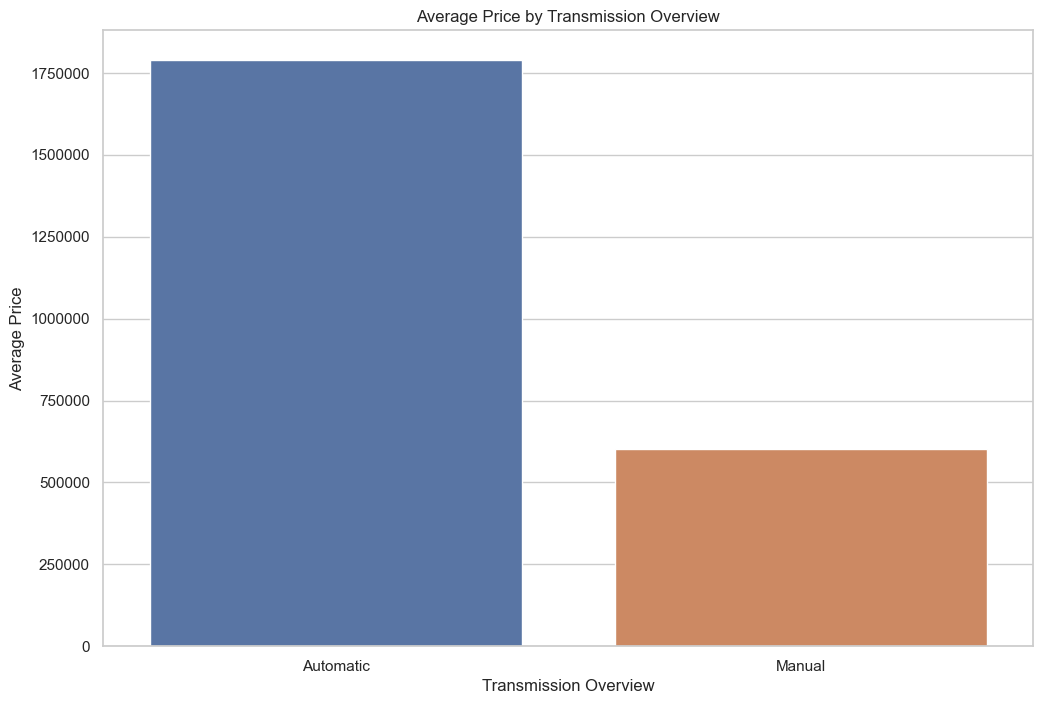

In [214]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Transmission_Type', y='price', data=df, ci=None)
plt.title('Average Price by Transmission Overview')
plt.xlabel('Transmission Overview')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [211]:
# Assuming 'transmission_overview' is the correct column name
df['Transmission_Type'] = df['transmission_overview'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
df['Manufacturing_Year'] = df['transmission_overview'].apply(lambda x: int(x) if isinstance(x, (int, float)) else None)

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_13400\78871242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Manufacturing_Year', y='price', data=df, ci=None)
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(

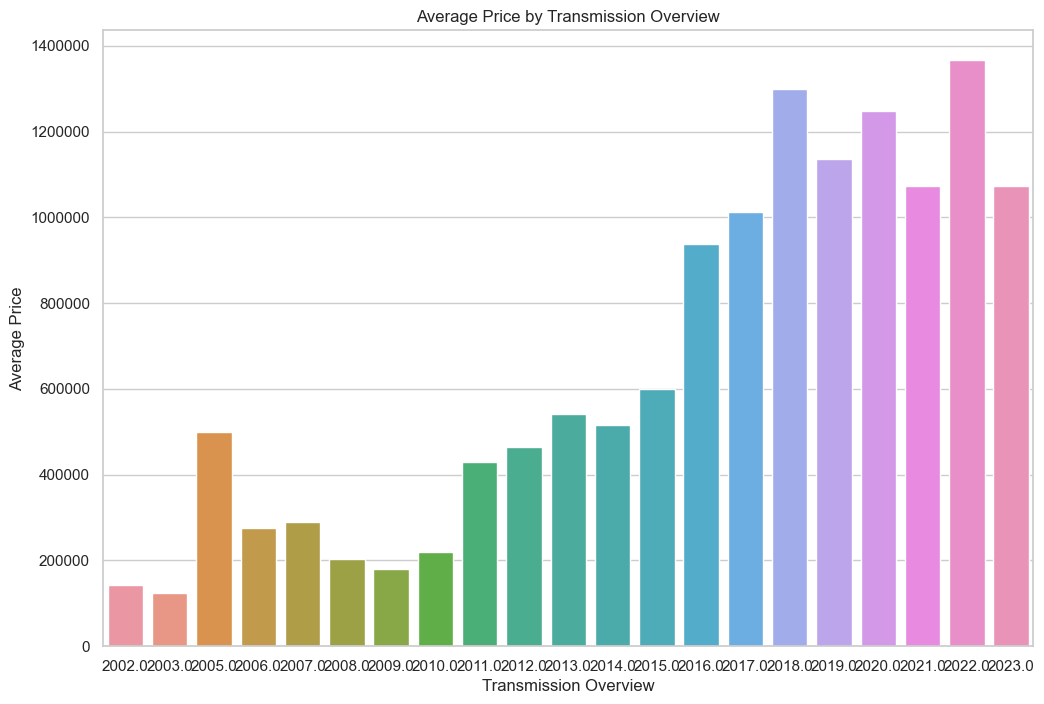

In [215]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Manufacturing_Year', y='price', data=df, ci=None)
plt.title('Average Price by Transmission Overview')
plt.xlabel('Transmission Overview')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [218]:
df.head()

,fuel_type,body_type,kilometers,transmission,owner_number,owner,oem,model,model_year,central_variant_id,...,Fuel Suppy System,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type,Transmission_Type,Manufacturing_Year
0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,...,Electronic Fuel Injection(EFI),4825mm,1825mm,1480mm,2775mm,1580mm,6 Speed,FWD,Automatic,NaN
1,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,...,MPFi,3429mm,1560mm,1541mm,185mm,2348mm,5-Speed,2WD,Manual,NaN
2,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,...,None,3991mm,1750,1605,2500,1536,5 Speed,5,Automatic,NaN
3,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,...,MPFI,3940 mm,1710 mm,1505 mm,"2,525 mm","1,505 mm",5 Speed,FWD,Manual,NaN
4,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,...,CRDI,4385mm,2019mm,1608mm,2603mm,1571mm,7-Speed S-Tronic,AWD,Automatic,NaN


C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


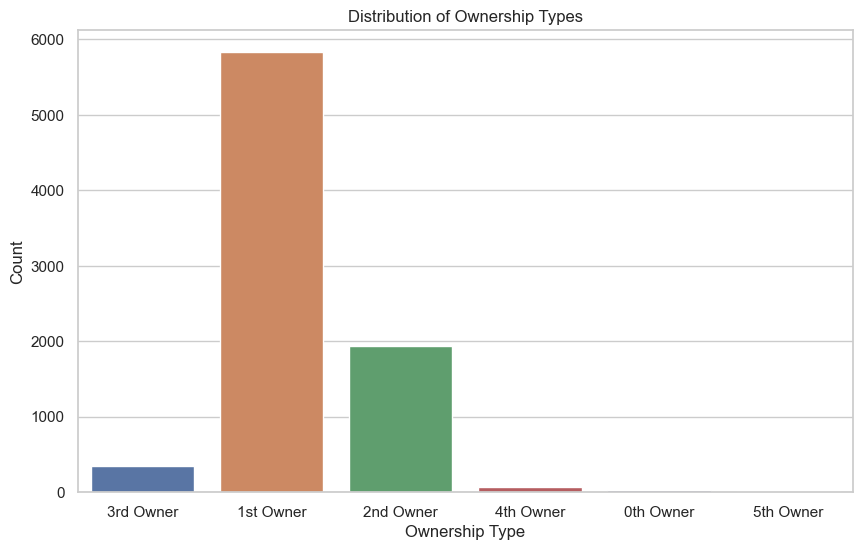

In [219]:
#Count plot for ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='owner', data=df)
plt.title('Distribution of Ownership Types')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


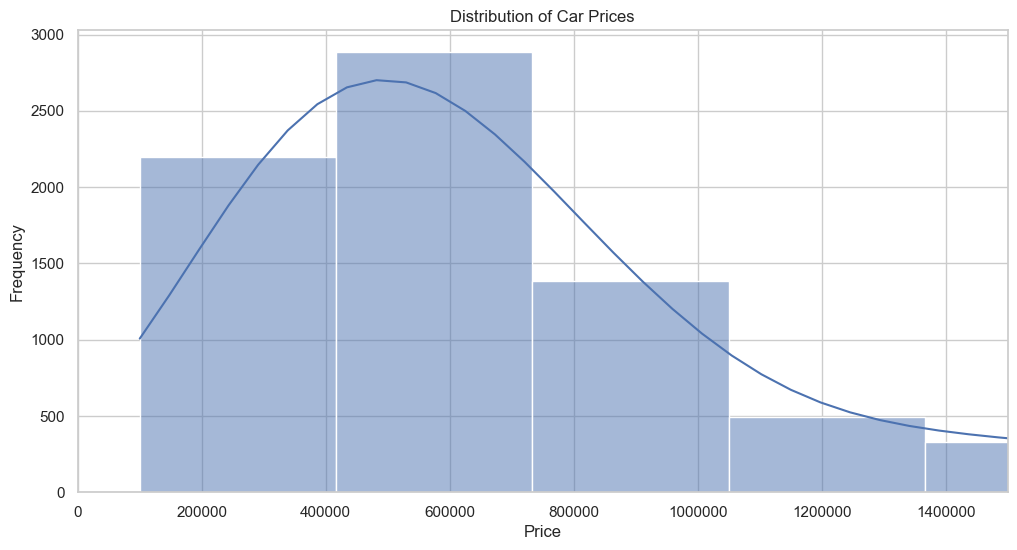

In [224]:
#Distribution of Car Prices:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1500000) 
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

In [133]:
#Applying Encoding

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8239 entries, 0 to 1480
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fuel_type                8239 non-null   object 
 1   body_type                8239 non-null   object 
 2   kilometers               8239 non-null   object 
 3   transmission             8239 non-null   object 
 4   owner_number             8239 non-null   int64  
 5   owner                    8239 non-null   object 
 6   oem                      8239 non-null   object 
 7   model                    8239 non-null   object 
 8   model_year               8239 non-null   int64  
 9   central_variant_id       8239 non-null   int64  
 10  variant_name             8239 non-null   object 
 11  price                    8239 non-null   float64
 12  registration_year        8239 non-null   object 
 13  insurance_validity       8239 non-null   object 
 14  fuel_type_overview       8239

In [226]:
import pandas as pd

# Assuming 'df' is your DataFrame
unique_values_per_column = {column: df[column].unique() for column in df.columns}

# Print or use the unique values
for column, values in unique_values_per_column.items():
    print(f"Unique values in column '{column}':\n{values}")

Unique values in column 'fuel_type':
['Petrol' 'Diesel' 'Cng' 'Electric' 'Lpg']
Unique values in column 'body_type':
['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' '' 'Convertibles' 'Minivans'
 'Pickup Trucks' 'Wagon' 'Hybrids']
Unique values in column 'kilometers':
['70,000' '23,981' '7,100' ... '37,950' '1,56,039' '93,003']
Unique values in column 'transmission':
['Automatic' 'Manual']
Unique values in column 'owner_number':
[3 1 2 4 0 5]
Unique values in column 'owner':
['3rd Owner' '1st Owner' '2nd Owner' '4th Owner' '0th Owner' '5th Owner']
Unique values in column 'oem':
['Toyota' 'Datsun' 'Renault' 'Hyundai' 'Audi' 'Maruti' 'Tata' 'Jeep'
 'Land Rover' 'Honda' 'Mercedes-Benz' 'Mahindra' 'Skoda' 'BMW' 'Fiat'
 'Ford' 'Hindustan Motors' 'Volvo' 'Chevrolet' 'Kia' 'MG' 'Volkswagen'
 'Porsche' 'Nissan' 'Jaguar' 'Mahindra Ssangyong' 'Mahindra Renault'
 'Mitsubishi' 'Isuzu' 'Citroen' 'Mini' 'Lexus']
Unique values in column 'model':
['Toyota Camry' 'Datsun RediGO' 'Renault Kiger' 'Hyundai i20' '

In [227]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit and transform the 'fuel_type' column
df['fuel_type'] = le.fit_transform(df['fuel_type'])
# Fit and transform the 'body_type' column
df['body_type'] = le.fit_transform(df['body_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['oem'] = le.fit_transform(df['oem'])
df['model'] = le.fit_transform(df['model'])
df['variant_name'] = le.fit_transform(df['variant_name'])
df['insurance_validity'] = le.fit_transform(df['insurance_validity'])
df['fuel_type_overview'] = le.fit_transform(df['fuel_type_overview'])

In [228]:
df['rto'] = df['rto'].str.upper()
le = LabelEncoder()
df['rto'] = le.fit_transform(df['rto'])
print("Unique encoded values in 'rto':", df['rto'].unique())

Unique encoded values in 'rto': [417 430 421 427 429 422 428 270 424 423  82 453 451 275 431 279 403  35
 435 209 438  39 426 437 434  83 448 454 413 211 439 441  38 203 425 433
 440 210 452  87 436 101 143 450 189 139 398 432   0 193  81 195 138 455
  42   9 144   3 446 419 449  91 443 119 445 140 420 418  40 170  67 442
 444  37 447 215 234 235 251  48 262  57 238 224 246 255 122 225   4 107
 227 241  77 242 237 259 264 231 266 257  92 239 236 269 229 240 396 205
 384 248 258 254 285 232 261 228 245 223 244 216 250  89 252 247 124 201
 256  68 113 191 230 226  55  70 177 243 268 217 260 233 263 208  79 200
  61 120 249 267 415  90  71 265 410  43 126 204  41 253 196 414 351 356
 354 355 377  16 361 367 360  34 358 373 375 357 372 362 363 352 368 353
  17  27 359 380  12 378 350 370  19  88  23  29 376  14  20 374  15 349
  30 365  21 379  32 381 369  31  24 348  22  13  84 273  25  18  28 366
 383 183 272  26   6 271  11 222  10   8 198 312 213  86   2 411 371 382
 194 364 311 274   

In [229]:
# Extract numerical part and convert to numeric type
df['engine_displacement'] = df['engine_displacement'].str.extract('(\d+)').astype(float)

In [230]:
print("Unique encoded values in 'engine_displacement':", df['engine_displacement'].unique())

Unique encoded values in 'engine_displacement': [2494.  799.  999. 1197. 1968. 1086. 1298.  998. 1956. 2755.   nan 1199.
 1373. 1497. 1591. 1950. 1496. 1396. 1799. 1047. 1198. 1598. 1995. 1368.
 1998. 1499. 1498. 1797. 1999. 2143. 1248.  796. 1582. 3993. 1798. 2179.
 2982. 2400. 2499. 1462. 1997. 1996. 1451.  814. 1353. 1186. 1493. 2393.
 1948. 2993. 1984. 1120. 1461. 1390. 2354. 1991. 1969. 2523. 4806. 2359.
 2184. 3198. 2157. 1196. 2987. 1364. 1794.  936. 2994. 1399. 2967. 2696.
 1993. 1193. 1596. 1490. 2198. 1061. 1349.    0. 2995. 3498. 2489. 1395.
 1796. 1495. 1586. 2998. 1194. 1896.  995. 2996. 1599. 2498.  624. 1985.
 1172. 1330. 2148. 2446. 1332. 1405. 1781. 2609. 2496. 1341. 2956. 2231.
 1595. 2694. 2999. 2925. 3456. 2360. 2199. 1397.  793. 2894. 4663. 1482.
 2979. 2487. 4134. 1422. 2477. 2997. 1590. 2362.  993.   72. 3597. 2200.
 1108.]


In [233]:
df['Transmission_Type'] = le.fit_transform(df['Transmission_Type'])

In [234]:
df['mileage_numeric'] = df['mileage'].str.extract('(\d+\.\d+)').astype(float)

# Drop rows where 'mileage_numeric' is NaN (for cases where no numeric value was found)
df = df.dropna(subset=['mileage_numeric'])

# Drop the original 'mileage' column if needed
# df = df.drop(columns=['mileage'])

# Display the unique values in the new 'mileage_numeric' column
unique_mileage_values = df['mileage_numeric'].unique()
print("Unique values in column 'mileage_numeric':", unique_mileage_values)

Unique values in column 'mileage_numeric': [19.16  22.7   19.03  15.73  20.52  20.3   25.17  17.5   18.9   18.6
 22.3   19.81  14.6   21.4   15.04  24.35  17.1   23.95  17.33  20.73
 20.7   14.8   22.38  17.7   23.1   21.79  16.1   21.9   17.4   17.3
 21.01  13.1   27.28  20.5   22.5   16.07  20.37  12.1   15.4   15.85
 18.7   25.1   21.74  35.6   16.5   17.68  20.36  12.8   16.3   14.59
 22.41  14.84  20.51  20.77  19.7   18.15  19.33  19.67  14.16  12.99
 12.65  14.53  14.08  17.19  22.25  12.55  23.9   17.92  19.6   11.2
 17.01  12.2   23.01  19.01  13.06  19.4   16.95  15.8   12.4   18.2
 15.1   21.1   17.8   26.49  18.5   21.7   16.8   14.28  20.4   28.09
 22.05  21.66  26.2   18.55  18.49  15.26  24.52  22.1   20.89  25.47
 17.09  14.5   19.28  16.2   27.39  24.3   16.25  16.47  13.6   16.09
 21.02  16.02  14.69  14.21  22.54  17.03  18.3   22.32  18.78  24.76
 20.8   25.8   11.7   24.39  21.72  13.68  19.49  16.24  17.9   25.24
 19.2   19.1   30.48  14.1   17.05  13.96  21.21  1

In [235]:
# Create two new columns to store the cleaned numeric values for 'CC' and 'bhp'
df['engine_cc'] = df['engine'].str.extract('(\d+) CC').astype(float)
df['engine_bhp'] = df['engine'].str.extract('(\d+\.\d+)bhp').astype(float)

# Display unique values in the new 'engine_cc' and 'engine_bhp' columns
unique_engine_cc_values = df['engine_cc'].unique()
unique_engine_bhp_values = df['engine_bhp'].unique()

print("Unique values in column 'engine_cc':", unique_engine_cc_values)
print("Unique values in column 'engine_bhp':", unique_engine_bhp_values)

Unique values in column 'engine_cc': [2494.  799.  999. 1968. 1197. 1086. 1298.  998. 1956. 2755. 1199. 1373.
 1591. 1497. 1950. 1496. 1396. 1799. 1047. 1598. 1995. 1368. 1998. 1499.
 1498. 1198. 1817. 1797. 1999. 2143. 1248.  796. 1582. 3993. 1798. 2982.
 2400. 2499. 1462. 1997. 1996. 2179.  814. 1353. 1186. 1493. 1948. 2993.
 1984. 1461. 1390. 2354. 2393. 1969. 2523. 1451. 4806. 2359. 2184. 1120.
 3198. 2157. 1196. 1364. 1794. 1061.  936. 1399. 1495.  995. 2967. 2696.
 1405. 2987. 1193. 1596. 1490. 1991. 1349. 2995. 1395. 2198. 2609. 3498.
 2489. 1172. 1796. 1586. 2835. 1194. 2498. 2953. 1896. 1599. 2199. 4395.
  624. 2477. 1985. 1330.  793. 2148. 2996. 1781. 2496. 1341. 2231. 1595.
 2446. 2998. 2999. 2925. 3456. 2360. 4663. 1482. 2694. 2979. 4134.  993.
 1422. 2487. 1299. 2497. 1590. 2362. 5000. 2200. 1108.]
Unique values in column 'engine_bhp': [nan]


In [236]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Create a new column to store the cleaned numeric values for 'bhp'
df['max_power_bhp'] = df['max_power'].str.extract('(\d+\.\d+)bhp').astype(float)

# Handle cases where power is provided in 'PS'
df['max_power_ps'] = df['max_power'].str.extract('(\d+\.\d+) PS')
conversion_factor_ps_to_bhp = 0.98632  # 1 PS is approximately 0.98632 bhp
df['max_power_ps'] = df['max_power_ps'].astype(float) * conversion_factor_ps_to_bhp

# Handle cases where power is provided in 'Nm' (torque)
df['max_power_nm'] = df['max_power'].str.extract('(\d+\.\d+)Nm')

# Display unique values in the new 'max_power_bhp', 'max_power_ps', and 'max_power_nm' columns
unique_max_power_bhp_values = df['max_power_bhp'].unique()
unique_max_power_ps_values = df['max_power_ps'].unique()
unique_max_power_nm_values = df['max_power_nm'].unique()

print("Unique values in column 'max_power_bhp':", unique_max_power_bhp_values)
print("Unique values in column 'max_power_ps':", unique_max_power_ps_values)
print("Unique values in column 'max_power_nm':", unique_max_power_nm_values)

Unique values in column 'max_power_bhp': [158.2    53.64   71.01  174.33   81.8    68.05   53.3    85.8    67.1
  53.26  167.67   83.1   174.5    65.71      nan  67.05  118.35   91.1
  81.86  121.3    88.5   113.18   67.04  191.7   105.5   117.6    88.7
 187.74  117.3   110.4    98.6    68.07   55.92   86.8    78.9   147.5
 149.92   88.76   46.3    86.83  126.2   174.3   100.6   168.5    62.1
  81.83  103.26  102.53  108.62  215.01  152.87   55.2    82.85  103.2
 116.4   138.03   47.33   72.4   116.3   138.08   73.97  113.43  103.25
  97.6   119.35  261.4   156.9    84.82  108.45   93.7   120.33   82.4
 126.3   177.6   108.6   147.51  113.98   59.18  160.77  237.36   47.3
 394.3   201.15  101.65  118.41  138.13  147.8   198.25  113.42  104.55
  88.77   88.73   75.94  118.36  178.49   70.02   76.8    83.14   83.8
  58.33  150.19   79.4   254.79   84.8    86.7    73.9   120.96  167.62
 138.1   170.63  153.86   56.3    98.63  103.5   121.36   67.06   63.1
 136.78  123.37   75.1   120.69  

In [237]:
# Create a new column to store the cleaned numeric values for 'torque'
df['torque_nm'] = df['torque'].str.extract('(\d+\.\d+|\d+)Nm').astype(float)

# Display unique values in the new 'torque_nm' column
unique_torque_nm_values = df['torque_nm'].unique()
print("Unique values in column 'torque_nm':", unique_torque_nm_values)

Unique values in column 'torque_nm': [213.    72.    96.   380.   113.    99.   114.    90.    99.04 350.
 115.   450.    89.   170.   130.      nan 143.8  400.   140.   145.
 300.   250.    91.   110.   200.    99.07 154.9   82.1  109.   111.7
 177.5  192.2   62.   259.9  173.   114.73 360.    96.1  440.   114.7
 138.   148.   111.8   74.5   95.   113.7  153.   146.   151.    69.
 280.   144.   240.   320.   134.   219.7  620.   190.   370.   500.
 259.88 108.5  222.   343.   171.6  104.   178.   245.    85.32 340.
 136.8  171.62 195.   172.   142.   180.4  470.   132.   248.   480.
 420.   560.   102.   106.5   78.   192.   108.   215.   142.5  112.
 175.   150.   124.6  160.   319.    90.3  149.   650.   402.    84.
 132.38 205.   135.4  204.   220.   230.   152.   619.   260.   430.
 122.   290.   327.   114.74 330.   104.4  460.   101.   385.    98.
 355.   218.   259.8  135.3  233.    59.   285.   219.6  180.   124.5
 689.    94.14 275.   119.   600.   259.87 247.   113.75  60.  

In [238]:
# Create a new column to store the cleaned numeric values for 'wheel_size'
df['wheel_size_numeric'] = df['wheel_size'].str.extract('(\d+)').astype(float)

# Display unique values in the new 'wheel_size_numeric' column
unique_wheel_size_numeric_values = df['wheel_size_numeric'].unique()
print("Unique values in column 'wheel_size_numeric':", unique_wheel_size_numeric_values)

Unique values in column 'wheel_size_numeric': [17.  5. 16. 14. 13. 18. 15.  8.  7. 12.  6. 20. 19. nan  9.  4. 21. 10.]


In [239]:
# Fit and transform the 'Engine Type' column
df['Engine Type Encoded'] = le.fit_transform(df['Engine Type'])

# Display the unique values and corresponding encoded values
encoded_values = dict(zip(df['Engine Type'].unique(), df['Engine Type Encoded'].unique()))
print("Encoded values:")
print(encoded_values)

# Display the DataFrame with the new encoded column
print(df[['Engine Type', 'Engine Type Encoded']])

Encoded values:
{'2AR FXE Petrol Engine ': 145, '0.8L Petrol Engine': 7, '1.0L energy': 26, 'TDI Diesel Engine': 342, 'K12M Petrol Engine': 268, '1.1 L Petrol': 28, 'Petrol Engine': 309, 'In-Line Engine': 250, 'K Series Petrol Engine': 260, 'IRDE2 Engine': 239, 'Kryotec 2.0 L Turbocharged Engine': 292, 'VVT Petrol Engine': 407, '1-GD FTV Engine': 9, 'K10C': 267, '2.0-Litre 4-Cyl Multijet II Engine': 124, '1.2l Turbocharged Revotron Engine': 53, 'k14B VVT Engine': 430, '1.2 Kappa petrol': 31, 'VTVT Petrol Engine': 402, 'K Series Dual jet': 258, '1.5 l MPi petrol': 71, 'K10B Engine': 264, 'K10B Petrol Engine': 266, 'Kappa VTVT Petrol Engine': 291, 'CDI In-line Engine': 178, '1.5 Dual VVT-i Engine': 62, 'Diesel': 212, 'i VTEC Engine': 421, 'D15 1.5 Liter Diesel Engine': 187, '1.2L VVT Engine': 52, 'Revotorq Engine': 316, 'Turbocharged Diesel Engin': 361, '1.0L Petrol Engine': 21, 'FIRE Engine': 227, 'TwinPower Turbo Inline 4 Cylinder Engine': 372, '2.0L GME T4 DI TC': 128, 'i-VTEC Petrol 

In [240]:
from sklearn.preprocessing import LabelEncoder

# Convert all values in 'Values per Cylinder' to strings
df['Values per Cylinder'] = df['Values per Cylinder'].astype(str)

# Drop rows with specified values
values_to_drop = ['DOHC', 'MPFI ', '69']
df = df[~df['Values per Cylinder'].isin(values_to_drop)]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Values per Cylinder' column
df['Values per Cylinder Encoded'] = label_encoder.fit_transform(df['Values per Cylinder'])

# Display the unique values and corresponding encoded values
encoded_values = dict(zip(df['Values per Cylinder'].unique(), df['Values per Cylinder Encoded'].unique()))
print("Encoded values:")
print(encoded_values)

# Display the DataFrame with the new encoded column
print(df[['Values per Cylinder', 'Values per Cylinder Encoded']])

Encoded values:
{'4': 2, '3': 1, 'SOHC': 11, 'None': 10, '2': 0, 'GDi': 5, 'Yes': 14, 'MPFi': 7, 'CRDi': 4, 'Turbo': 12, 'No': 9, 'twin': 15, 'Twin': 13, '5': 3, 'Multipoint Injection': 8, 'MPFI': 6}
     Values per Cylinder  Values per Cylinder Encoded
0                      4                            2
1                      4                            2
2                      4                            2
4                      4                            2
5                      4                            2
...                  ...                          ...
1475                   4                            2
1476                   4                            2
1478                   4                            2
1479                   4                            2
1480                   4                            2

[7021 rows x 2 columns]


In [241]:
df['Length'] = df['Length'].astype(str)

# Remove 'mm' from the values
df['Length'] = df['Length'].str.replace('mm', '').str.strip()

# Extract numeric values
df['Length'] = df['Length'].str.extract('(\d+)')

# Convert the 'Length' column to numeric
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

# Display unique values in the 'Length' column
unique_lengths = df['Length'].unique()
print("Unique values in column 'Length':", unique_lengths)

Unique values in column 'Length': [4.825e+03 3.429e+03 3.991e+03 4.385e+03 3.655e+03 3.610e+03 3.679e+03
 4.160e+03 3.595e+03 3.850e+03 3.731e+03 3.585e+03 4.598e+03 3.995e+03
 4.795e+03 4.395e+03 3.545e+03 3.993e+03 4.490e+03 3.805e+03 4.270e+03
 3.845e+03 4.440e+03 3.715e+03 3.765e+03 5.063e+03 4.425e+03 3.940e+03
 4.585e+03 4.545e+03 3.746e+03 4.386e+03 4.520e+03 4.560e+03 4.936e+03
 4.882e+03 4.453e+03 3.999e+03 3.955e+03 4.370e+03 3.695e+03 4.915e+03
 4.325e+03 4.530e+03 4.570e+03 4.591e+03 3.599e+03 4.265e+03 3.495e+03
 3.700e+03 3.990e+03 4.629e+03 4.540e+03 4.661e+03 4.705e+03 4.375e+03
 3.565e+03 4.637e+03 4.644e+03 4.000e+00 3.985e+03 4.315e+03 4.797e+03
 4.985e+03 4.413e+03 3.435e+03 4.620e+03 3.840e+03 3.775e+03 3.445e+03
 3.636e+03 4.456e+03 4.445e+03 4.300e+03 4.933e+03 4.296e+03 3.675e+03
 4.549e+03 4.285e+03 5.091e+03 4.500e+03 3.971e+03 4.000e+03 4.697e+03
 4.648e+03 4.329e+03 4.868e+03 4.249e+03 8.950e+02 4.950e+03 3.530e+03
 4.735e+03 3.801e+03 4.656e+03 4.369e+03 4.

In [242]:
df['Length'].head()

0    4825.0
1    3429.0
2    3991.0
4    4385.0
5    3655.0
Name: Length, dtype: float64

In [243]:
df['Height'] = df['Height'].astype(str)

# Remove 'mm' from the values
df['Height'] = df['Height'].str.replace('mm', '').str.strip()

# Remove ',' from the values
df['Height'] = df['Height'].str.replace(',', '')

# Extract numeric values
df['Height'] = df['Height'].str.extract('(\d+)')

# Convert the 'Height' column to numeric
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Display unique values in the 'Height' column
unique_heights = df['Height'].unique()
print("Unique values in column 'Height':", unique_heights)

Unique values in column 'Height': [1480. 1541. 1605. 1608. 1675. 1560. 1478. 1530. 1670. 1474. 1550. 1706.
 1510. 1835. 1640. 1475. 1606. 1485. 1520. 1665. 1565. 1494. 1495. 1505.
 1774. 1450. 1535. 1466. 1421. 1487. 1848. 1666. 1708. 1544. 1601. 1555.
 1500. 1455. 1593. 1470. 1465. 1515. 1447. 1700. 1685. 1460. 1655. 1523.
 1630. 1760. 1786. 1850. 1590. 1539. 1713. 1765. 1755. 1690. 1695. 1627.
 1867. 1785. 1546. 1620. 1532. 1483. 1645. 1995. 1595. 1826. 1635. 1489.
 1976. 1538. 1469. 1522. 1567. 1624. 1661. 1626. 1453. 1471. 1503.   nan
 1795. 1817. 1639. 1420. 1612. 1930. 1545. 1457. 1418. 1796. 1652. 1880.
 1490. 1564. 1442. 1844. 1600. 1464. 1501. 1837. 1570. 1498. 1643. 1429.
 1658. 1845. 1678. 1427. 1671. 1432. 1540. 1468. 1525. 1740. 1642. 1441.
 1467. 1647. 1370. 1518. 1416. 1840. 1615. 1508. 1486. 1653. 1497. 1534.
 1603. 1537. 1619. 1698. 1975. 1482. 1607. 1477. 1650. 1825. 1308. 1800.
 1393. 1762. 1405. 1676. 1598. 1507. 1476. 1900. 1680. 1925. 1922. 1660.
 1572. 1459. 1586

In [244]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert the 'Wheel Base' column to string to handle mixed data types
df['Wheel Base'] = df['Wheel Base'].astype(str)

# Remove 'mm' from the values
df['Wheel Base'] = df['Wheel Base'].str.replace('mm', '').str.strip()

# Remove ',' from the values
df['Wheel Base'] = df['Wheel Base'].str.replace(',', '')

# Extract numeric values
df['Wheel Base'] = df['Wheel Base'].str.extract('(\d+)')

# Convert the 'Wheel Base' column to numeric
df['Wheel Base'] = pd.to_numeric(df['Wheel Base'], errors='coerce')

# Display unique values in the 'Wheel Base' column
unique_wheel_bases = df['Wheel Base'].unique()
print("Unique values in column 'Wheel Base':", unique_wheel_bases)

Unique values in column 'Wheel Base': [2775.  185. 2500. 2603. 2435. 2400. 2422. 2390. 2430. 2380. 2741. 2520.
 2745. 2636. 2360. 2498. 2650. 2450.  190. 2600. 2425. 3079. 2550. 2525.
  200. 2700. 2552. 2760. 2975. 3008. 2662. 2530. 2555. 2570. 2345. 2912.
 2464.  160. 2740. 2385. 2501. 2590. 2807. 2750.  690. 2774. 2685. 2673.
 2874. 2950.  120. 2348.  165. 2470. 2610. 2680.  180. 3070.  170. 2469.
 2465. 2810.  210. 2633.   nan 2405. 2800.  178.  116. 2873. 2647.  155.
 2699.  192. 3157. 2920. 2915. 1668. 2580. 2795. 2840.  205. 2460. 2968.
 2850. 2670. 1527. 2865. 2489. 2375. 2888. 2491. 2660. 2808. 1645. 2553.
 2519. 2480. 2440.  699. 2637. 2835. 2445. 2630. 2652. 2820. 3075. 2782.
 2761. 2486.  209.  110. 2780. 2585. 2350. 2622.  184. 2456. 2510. 2175.
  140. 2933.  145. 2651. 2725. 2490. 2620. 2994. 2909. 2578. 3095.   91.
   13. 2575. 2960. 2540. 2855. 2230. 2794.  156. 2711. 2730. 2786. 2648.
 2720. 2819. 2776. 2690. 1233. 2984. 3060. 2512. 1547. 2803. 2455. 2705.
 2864. 3210. 

In [245]:
# Convert the 'Kerb Weight' column to string to handle mixed data types
df['Kerb Weight'] = df['Kerb Weight'].astype(str)

# Remove 'mm' from the values
df['Kerb Weight'] = df['Kerb Weight'].str.replace('mm', '').str.strip()

# Remove ',' from the values
df['Kerb Weight'] = df['Kerb Weight'].str.replace(',', '')

# Extract numeric values
df['Kerb Weight'] = df['Kerb Weight'].str.extract('(\d+)')

# Convert the 'Kerb Weight' column to numeric
df['Kerb Weight'] = pd.to_numeric(df['Kerb Weight'], errors='coerce')

# Display unique values in the 'Kerb Weight' column
unique_kerb_weights = df['Kerb Weight'].unique()
print("Unique values in column 'Kerb Weight':", unique_kerb_weights)

Unique values in column 'Kerb Weight': [1580. 2348. 1536. 1571.  830. 1463.  730. 1470. 1295. 1485.  710. 1400.
 1700. 1515. 2280. 1430. 1551. 1200. 1495. 1060. 2590. 1530. 1420.  805.
 1479. 1595. 1105. 1505. 1475. 2760. 1210. 1205. 1460. 1240. 1605. 2027.
 1225. 1519. 1044. 1480. 1476. 1084. 1280. 1490. 1627. 1345. 1408. 1180.
 1569. 1555. 2450. 1549. 1025. 1300. 1617. 1510. 1825. 1040.   nan 1540.
 1270. 1315. 1619. 1632. 1250. 1020. 1445. 1560. 1450. 1641. 2235. 1064.
 1600. 1386. 1030. 2552.  750. 1100.  865. 1095. 1562. 2740. 1335. 1130.
 1650. 1496.  825. 2250. 1615. 1103. 1750. 1520. 1380. 1316. 1770. 1616.
 2673. 1517. 1403. 1585. 1065. 1110. 1535. 1529.  755. 1115. 2750. 2500.
  970. 1198. 1621. 1235. 1559. 2651.  982. 1195. 1501. 1800. 1626. 1140.
 1217. 1648. 1107. 1150. 1220. 1591. 1160.  726. 1588. 1230.  855.  930.
  945. 1561.  920. 1155.  924.  935. 1525. 1260. 1544. 1655. 2865. 1725.
 1075.  905.  950. 1440.  725.  990. 1484. 1492. 1063.  965. 1601. 1670.
 1564. 1201.

In [246]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert the 'Gear Box' column to string to handle mixed data types
df['Gear Box'] = df['Gear Box'].astype(str)

# Standardize the values by removing extra spaces and converting to lowercase
df['Gear Box'] = df['Gear Box'].str.lower().str.strip()

# Replace variations with standardized values
gearbox_mapping = {
    '6 speed': '6-speed',
    '5 speed': '5-speed',
    '7 speed': '7-speed',
    '8 speed': '8-speed',
    '9 speed': '9-speed',
    'cv t': 'cvt',
    '4 speed': '4-speed',
    'automatic': 'auto',
    'sequential shift': 'sequential shift',
    'dct': 'dct',
    'i vt': 'ivt',
    'ags': 'ags',
    'tiptronic': 'tiptronic',
    's tronic': 's tronic',
    '7g-dct': '7-speed dct',
    'mercedes benz 7 speed automatic': '7-speed auto',
    '6-speed imt': '6-speed imt',
    '6 speed ivt': '6-speed ivt',
    '6-speed automatic transmission': '6-speed auto',
    'six speed': '6-speed',
    '8-speed automatic transmission': '8-speed auto',
    'seven speed': '7-speed',
    'e-cvt': 'ecvt',
    'direct drive': 'direct drive'
}

df['Gear Box'] = df['Gear Box'].replace(gearbox_mapping)

# Display unique values in the 'Gear Box' column
unique_gearbox_values = df['Gear Box'].unique()
print("Unique values in column 'Gear Box':", unique_gearbox_values)

Unique values in column 'Gear Box': ['6-speed' '5-speed' '7-speed s-tronic' 'cvt' '5' '9-speed'
 '5 speed manual' '8-speed steptronic' '8-speed' '7-speed' '4-speed' '8'
 '7 speed dct' '6-speed dct' 'ags' '7 speed 7g-dct' '7-speed auto'
 '7-speed dct' '8-speed steptronic sport automatic transmission'
 '8 speed sport' 'none' '6-speed imt' '7-speed s tronic' '8-speed auto'
 'ecvt' 'ivt' '6-speed ivt' '5-speed`' '7 speed cvt'
 'five speed manual transmission gearbox' '7-speed dsg' '8 speed cvt'
 '6-speed cvt' 'five speed manual transmission'
 '5 speed at+ paddle shifters' '6 speed automatic' 'awd' '7 speed dsg'
 'six speed geartronic, six speed automati'
 '5 speed manual (cable type gear shift)' 'six speed automatic gearbox'
 '10 speed' 'six speed  gearbox' '7g dct 7-speed dual clutch transmission'
 '7 speed s tronic' '9 speed tronic' '9g-tronic'
 '7 speed steptronic sport' '8 speed tiptronic' '8speed' '6 speed at'
 '8-speed steptronic automatic' '7-speed stronic'
 'six speed automatic tra

In [247]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
le_drive_type = LabelEncoder()
le_gear_box = LabelEncoder()

# Encode 'Drive Type' column
df['Drive Type Encoded'] = le_drive_type.fit_transform(df['Drive Type'])

# Encode 'Gear Box' column
df['Gear Box Encoded'] = le_gear_box.fit_transform(df['Gear Box'])

# Display the mapping of labels to original categories for reference
drive_type_mapping = dict(zip(le_drive_type.classes_, le_drive_type.transform(le_drive_type.classes_)))
gear_box_mapping = dict(zip(le_gear_box.classes_, le_gear_box.transform(le_gear_box.classes_)))

print("Drive Type Encoding Mapping:", drive_type_mapping)
print("Gear Box Encoding Mapping:", gear_box_mapping)

# Display the updated DataFrame
print(df[['Drive Type', 'Drive Type Encoded', 'Gear Box', 'Gear Box Encoded']])

Drive Type Encoding Mapping: {'10': 0, '2': 1, '2 WD': 2, '2WD': 3, '2WD ': 4, '4': 5, '4 WD': 6, '4WD': 7, '4X2': 8, '4X4': 9, '4x2': 10, '4x4': 11, '5': 12, '6': 13, '7': 14, '8': 15, 'AWD': 16, 'All Wheel Drive': 17, 'Electric': 18, 'FWD': 19, 'FWD ': 20, 'Front Wheel Drive': 21, 'Permanent all-wheel drive quattro': 22, 'Power': 23, 'RWD': 24, 'RWD(with MTT)': 25, 'Rear Wheel Drive with ESP': 26, 'Two Wheel Drive': 27, None: 28}
Gear Box Encoding Mapping: {'10 speed': 0, '4-speed': 1, '5': 2, '5 speed at+ paddle shifters': 3, '5 speed manual': 4, '5 speed manual (cable type gear shift)': 5, '5-speed': 6, '5-speed`': 7, '6 speed at': 8, '6 speed automatic': 9, '6 speed mt': 10, '6-speed': 11, '6-speed at': 12, '6-speed cvt': 13, '6-speed dct': 14, '6-speed imt': 15, '6-speed ivt': 16, '6speed': 17, '7 speed 7g-dct': 18, '7 speed cvt': 19, '7 speed dct': 20, '7 speed dsg': 21, '7 speed s tronic': 22, '7 speed steptronic sport': 23, '7-speed': 24, '7-speed auto': 25, '7-speed dct': 26,

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 1480
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    7021 non-null   int32  
 1   body_type                    7021 non-null   int32  
 2   kilometers                   7021 non-null   object 
 3   transmission                 7021 non-null   int32  
 4   owner_number                 7021 non-null   int64  
 5   owner                        7021 non-null   object 
 6   oem                          7021 non-null   int32  
 7   model                        7021 non-null   int32  
 8   model_year                   7021 non-null   int64  
 9   central_variant_id           7021 non-null   int64  
 10  variant_name                 7021 non-null   int32  
 11  price                        7021 non-null   float64
 12  registration_year            7021 non-null   object 
 13  insurance_validity     

In [250]:
#Drop the Features

In [252]:
# Specify the columns to drop
columns_to_drop = ['interior_features', 'exterior_features','Manufacturing_Year','year_of_manufacture','safety_features','entertainment_features','Fuel Suppy System','Gear Box','Drive Type','engine_bhp','max_power_ps','max_power_nm','Engine Type']
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 1480
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    7021 non-null   int32  
 1   body_type                    7021 non-null   int32  
 2   kilometers                   7021 non-null   object 
 3   transmission                 7021 non-null   int32  
 4   owner_number                 7021 non-null   int64  
 5   owner                        7021 non-null   object 
 6   oem                          7021 non-null   int32  
 7   model                        7021 non-null   int32  
 8   model_year                   7021 non-null   int64  
 9   central_variant_id           7021 non-null   int64  
 10  variant_name                 7021 non-null   int32  
 11  price                        7021 non-null   float64
 12  registration_year            7021 non-null   object 
 13  insurance_validity     

In [266]:
df['Width'].unique()

array(['1825mm', '1560mm', '1750', '2019mm', '1620 mm', '1645 mm',
       '1579mm', '1690mm', '1475mm', '1695mm', '1595mm', '1894mm',
       '1745mm', '1855mm', '1620mm', '1818mm', '1515mm', '1811', '1730mm',
       '1680', '1780mm', '1735', '1729mm', '1635mm', '1660mm', '1860mm',
       '1710 mm', '1866 mm', '1750mm', '1647mm', '1699mm', '1817mm',
       '2126mm', '1735mm', '1765mm', '1694mm', '1490mm', '1734mm',
       '1700mm', '1655', '1680mm', '2086mm', '1775mm', '1800mm', '1770mm',
       '1495mm', '1755', '2089mm', '1760mm', '1579', '1840mm', '1525mm',
       '2097mm', '2120mm', '1,680 mm', '1,770 mm', '1735 mm', '1822mm',
       '2145mm', '1926mm', '1694 mm', '1890mm', '1550mm', '1677',
       '1710mm', '1574mm', '1515', '1682mm', '1820mm', '1785', '1835mm',
       '1715mm', '1748mm', '1,726 mm', '1902mm', '1790mm', '1642mm',
       '1520', '1923 mm', '2098mm', '1703mm', '1813mm', '1776mm',
       '1778mm', '1854mm', None, '1845mm', '1490', '1790', '1830mm',
       '1770 mm', '

In [268]:
# Specify the columns to drop
columns_to_drop = ['owner','registration_year','ownership','transmission_overview','comfort_and_convenience','mileage','engine','max_power','torque','wheel_size','Values per Cylinder','Value Configuration']
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6994 entries, 0 to 1480
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    6994 non-null   int32  
 1   body_type                    6994 non-null   int32  
 2   kilometers                   6994 non-null   object 
 3   transmission                 6994 non-null   int32  
 4   owner_number                 6994 non-null   int64  
 5   oem                          6994 non-null   int32  
 6   model                        6994 non-null   int32  
 7   model_year                   6994 non-null   int64  
 8   central_variant_id           6994 non-null   int64  
 9   variant_name                 6994 non-null   int32  
 10  price                        6994 non-null   float64
 11  insurance_validity           6994 non-null   int32  
 12  fuel_type_overview           6994 non-null   int32  
 13  kms_driven             

In [271]:
df['kilometers'] = df['kilometers'].str.replace(',', '').astype(int)

In [276]:
df['No of Cylinder'].unique()

array([4, 3, 5, 6, None, 7, 8, 2], dtype=object)

In [278]:
import numpy as np
df['No of Cylinder'] = df['No of Cylinder'].replace({None: np.nan}).astype(float)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6994 entries, 0 to 1480
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    6994 non-null   int32  
 1   body_type                    6994 non-null   int32  
 2   kilometers                   6994 non-null   int32  
 3   transmission                 6994 non-null   int32  
 4   owner_number                 6994 non-null   int64  
 5   oem                          6994 non-null   int32  
 6   model                        6994 non-null   int32  
 7   model_year                   6994 non-null   int64  
 8   central_variant_id           6994 non-null   int64  
 9   variant_name                 6994 non-null   int32  
 10  price                        6994 non-null   float64
 11  insurance_validity           6994 non-null   int32  
 12  fuel_type_overview           6994 non-null   int32  
 13  kms_driven             

In [281]:
# Specify the columns to drop
columns_to_drop = ['Width', 'max_power_bhp']
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [282]:
df = df.dropna()

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5558 entries, 0 to 1480
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    5558 non-null   int32  
 1   body_type                    5558 non-null   int32  
 2   kilometers                   5558 non-null   int32  
 3   transmission                 5558 non-null   int32  
 4   owner_number                 5558 non-null   int64  
 5   oem                          5558 non-null   int32  
 6   model                        5558 non-null   int32  
 7   model_year                   5558 non-null   int64  
 8   central_variant_id           5558 non-null   int64  
 9   variant_name                 5558 non-null   int32  
 10  price                        5558 non-null   float64
 11  insurance_validity           5558 non-null   int32  
 12  fuel_type_overview           5558 non-null   int32  
 13  kms_driven             

In [287]:
df.to_csv('cardechoclean.csv', index=False)

In [288]:
df.to_excel('cardechoclean.xlsx', index=False)